In [1]:
# import classy module
from classy import Class
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# create instance of the class "Class"
LambdaCDM = Class()
# pass input parameters
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'tau_reio':0.05430842,
               'Pk_ini_type':'reconstruction_Pk','N_knots':4,'k_1':-4, 'k_2':-3,'k_3':-2.9, 'k_4':-1, 'k_5':-2.5,'k_6':-3.6, 'k_7':-1.1,'Pk_1':3.6e-9,'Pk_2':2.57e-9,'Pk_3':1.76e-9,'Pk_4':1.76e-9,'Pk_5':2.57e-9,'Pk_6':1.76e-9,'Pk_7':1.9e-9
#             'N_knots':3, 'k_i':str(0.000006)+','+str(0.0002)+','+str(5),'Pk_i':str(4e-9)+','+str(3e-9)+','+str(2e-9)})
})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.})
# run class
LambdaCDM.compute()

{'k [1/Mpc]': array([7.06619000e-06, 8.89580615e-06, 1.11991564e-05, 1.40989026e-05,
       1.77494668e-05, 2.23452548e-05, 2.81310091e-05, 3.54148422e-05,
       4.45846448e-05, 5.61287423e-05, 7.06619000e-05, 8.89580615e-05,
       1.11991564e-04, 1.40989026e-04, 1.77494668e-04, 2.23452548e-04,
       2.81310091e-04, 3.54148422e-04, 4.45846448e-04, 5.61287423e-04,
       7.06619000e-04, 8.89580615e-04, 1.11991564e-03, 1.40989026e-03,
       1.77494668e-03, 2.23452548e-03, 2.81310091e-03, 3.54148422e-03,
       4.45846448e-03, 5.61287423e-03, 7.06619000e-03, 8.89580615e-03,
       1.11991564e-02, 1.40989026e-02, 1.77494668e-02, 2.23452548e-02,
       2.81310091e-02, 3.54148422e-02, 4.45846448e-02, 5.61287423e-02,
       7.06619000e-02, 8.89580615e-02, 1.11991564e-01, 1.40989026e-01,
       1.77494668e-01, 2.23452548e-01, 2.81310091e-01, 3.54148422e-01,
       4.45846448e-01, 5.61287423e-01, 7.06619000e-01, 8.89580615e-01,
       1.11991564e+00, 1.40989026e+00, 1.77494668e+00, 2.234525

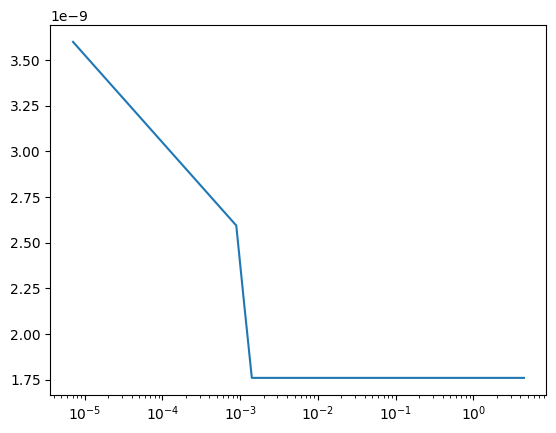

In [18]:
# get all C_l output
cls = LambdaCDM.lensed_cl(2500)
# To check the format of cls
cls.keys()

primordial = LambdaCDM.get_primordial()
#primordial = LambdaCDM.get_pk_and_k_and_z()
print (primordial)

prim = primordial['P_scalar(k)']
ks = primordial['k [1/Mpc]']

#print(ks)
#print(prim)

plt.plot(ks,prim)
plt.xscale('log')

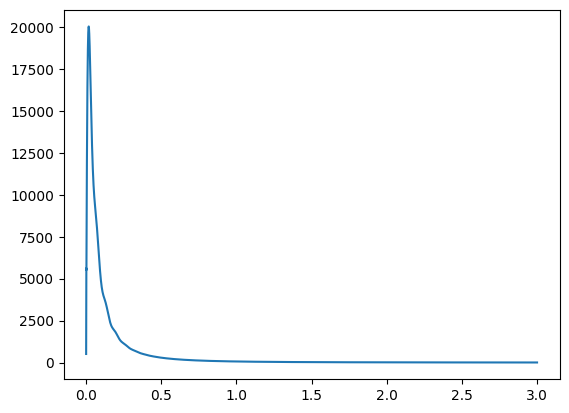

In [19]:

kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3
h = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0.)*h**3) # function .pk(k,z)

plt.plot(kk,Pk)
#plt.xscale('log')
#plt.yscale('log')

In [20]:
ll = cls['ell'][2:]
clTT = cls['tt'][2:]
clEE = cls['ee'][2:]
clPP = cls['pp'][2:]

In [21]:
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi

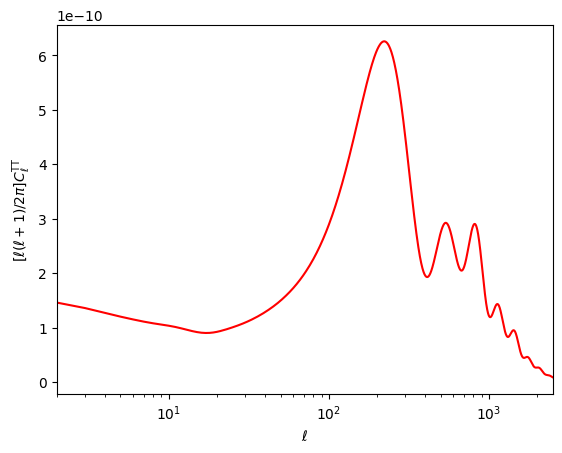

In [22]:
# plot C_l^TT
plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'r-')

In [18]:
# get P(k) at redhsift z=0
import numpy as np
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3
h = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0.)*h**3) # function .pk(k,z)

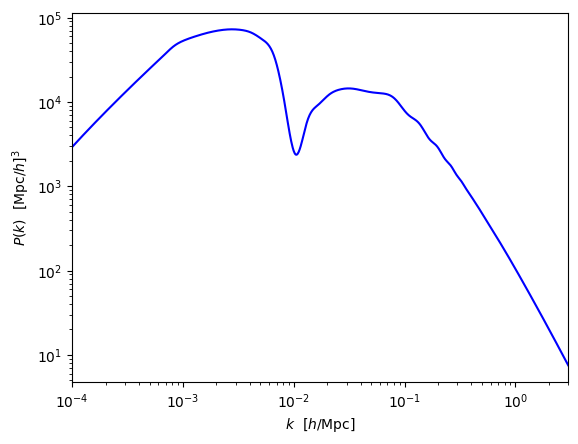

In [19]:
# plot P(k)
plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk,'b-')

In [ ]:
# optional: reset parameters to default in case you want 
# to set different parameters and rerun LambdaCDM.compute()
LambdaCDM.empty()